### Blurring
 - 평균값 필터 (Mean Filter)
   - 마스크 크기가 커질수록 부드러워 지나 연산량 증가!
   - 이해하기 쉽고 단순하나 성능이 그리 좋지 않음
 - 가우시안 필터 (gaussian Filter) 
   - 가까운 픽셀은 큰 가중치를 , 먼 픽셀은 작은 가중치로 평균 계산
   - 이미지에는 2차원 가우시안 필터 사용 
  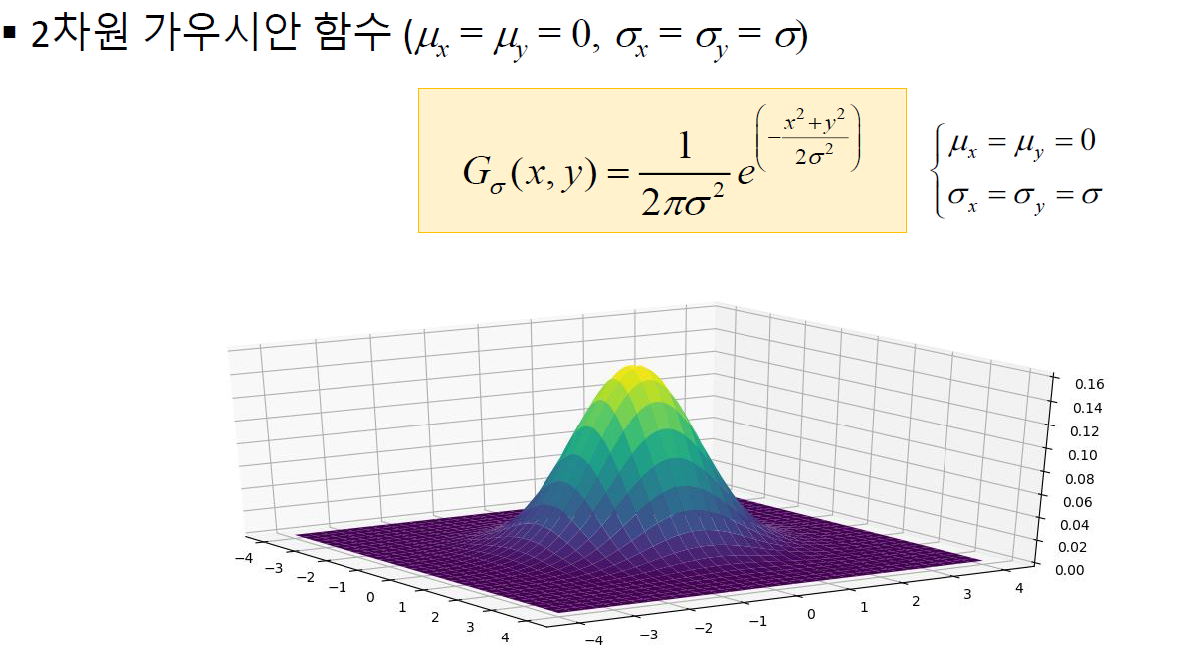
   - ``` 가우시안 필터 값```  
  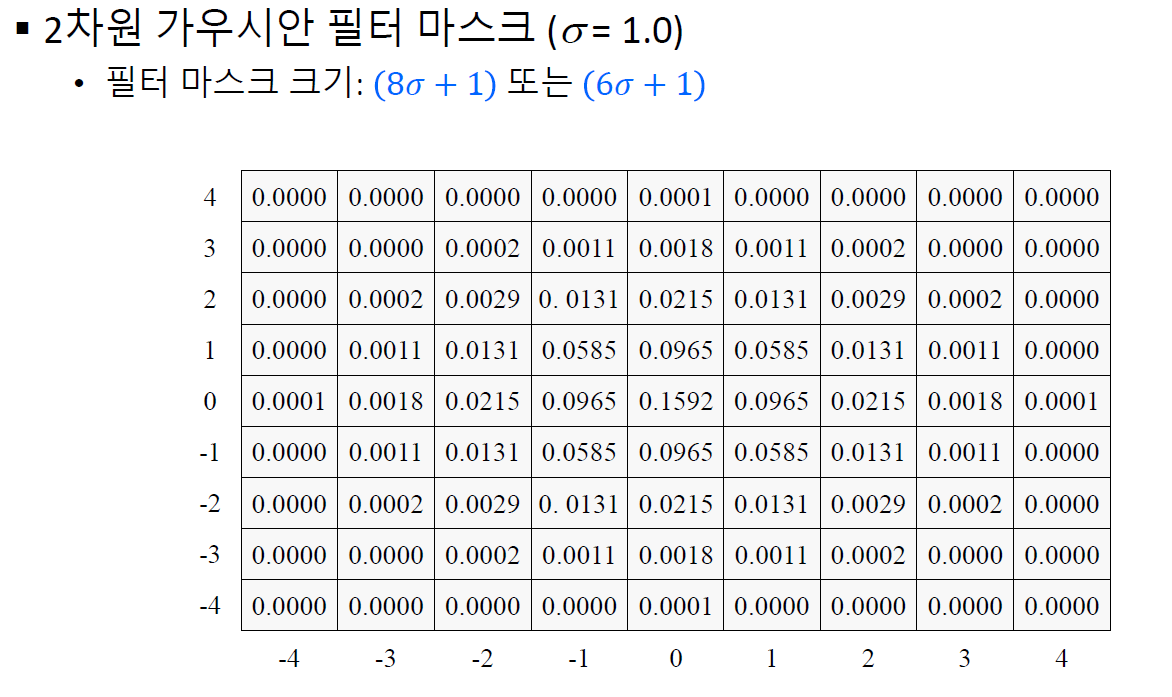
     - uint8 은 (6시그마+1)

가우시안 필터 (gaussian Filter) 
**```cv2.GaussianBlur(src,ksize,sigmaX,dst=None,sigmayY=None,borderType=None)-> dst```**
  - ksize : kernel 크기 , (0,0) 지정
  - sigmaX : x 방향 sigma
  - sigmaY : 0이면 sigmaX와 같다
  - borderType : 가장자리 픽셀 확장 방식
  

In [2]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch04\\rose.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

'''
kernel = np.ones((3, 3), dtype=np.float64) / 9.
dst = cv2.filter2D(src, -1, kernel)
'''
dst = cv2.blur(src, (3, 3))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


In [3]:
import sys
import numpy as np
import cv2

src = cv2.imread('.\\ch04\\rose.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

for ksize in (3, 5, 7):
    dst = cv2.blur(src, (ksize, ksize))

    desc = 'Mean: {}x{}'.format(ksize, ksize)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                1.0, 255, 1, cv2.LINE_AA)

    cv2.imshow('dst', dst)
    cv2.waitKey()

cv2.destroyAllWindows()


In [5]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch04\\rose.bmp', cv2.IMREAD_GRAYSCALE)

dst = cv2.GaussianBlur(src, (0, 0), 3)
dst2 = cv2.blur(src, (7, 7))

cv2.imshow('src', src)
cv2.imshow('Gaussian Filter', dst)
cv2.imshow('mean Filter', dst2)
cv2.waitKey()

cv2.destroyAllWindows()


In [7]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch04\\rose.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

for sigma in range(1, 6):
    # sigma 값을 이용하여 가우시안 필터링
    dst = cv2.GaussianBlur(src, (0, 0), sigma)

    desc = 'sigma = {}'.format(sigma)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                1.0, 255, 1, cv2.LINE_AA)

    cv2.imshow('dst', dst)
    cv2.waitKey()

cv2.destroyAllWindows()


## Shapening 
 - unsharp mask : 날카롭지 않은 영상(부드러워진 영상)을 이용하여 날카로운 영상 생성
 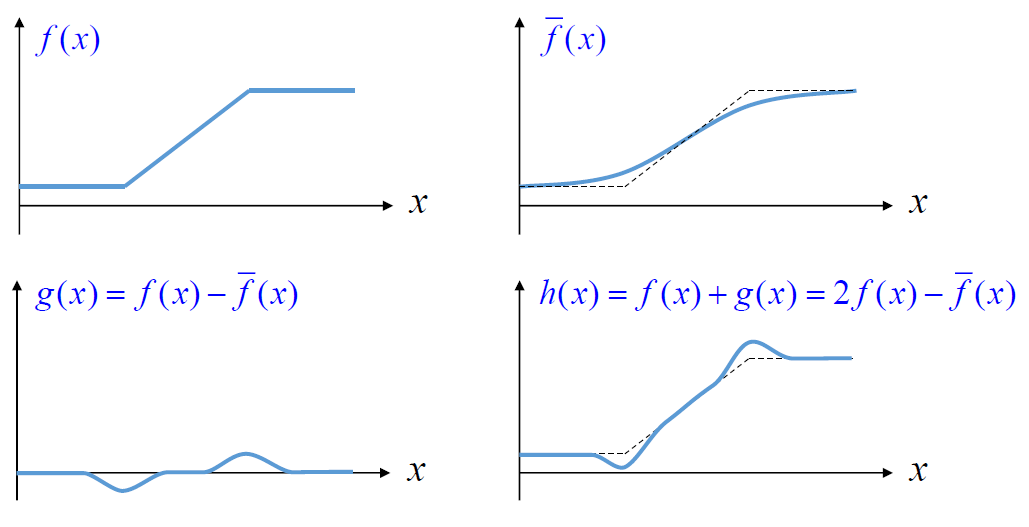

In [9]:
import sys
import numpy as np
import cv2

src = cv2.imread('.\\ch04\\rose.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

blr = cv2.GaussianBlur(src, (0, 0), 2) # sigma = 2 
sub = cv2.addWeighted(src,1,blr,-1,128)
dst = np.clip(2.0*src - blr, 0, 255).astype(np.uint8)
'''
13행의 dst는 아래처럼 작성 가능 
dst = cv2.addWeighted(src,2,blr,-1,0)
'''

cv2.imshow('src', src)
cv2.imshow('sub', sub)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

In [10]:
import sys
import numpy as np
import cv2

src = cv2.imread('.\\ch04\\rose.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

'''
color 영상의 경우 YCrCb 에서 Y plane으로 명암비 조절해서 작업한다
'''
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

src_f = src_ycrcb[:, :, 0].astype(np.float32)
blr = cv2.GaussianBlur(src_f, (0, 0), 2.0)
src_ycrcb[:, :, 0] = np.clip(2. * src_f - blr, 0, 255).astype(np.uint8)

dst = cv2.cvtColor(src_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


### 잡음 제거 
 - 영상의 픽셀 값에 추가되는 원치 않는 형태의 신호 
 - Gaussian noise / salt&pepper noise (옛날 아날로그 통신의 경우 , 요즘은 보기 힘들다) 
 
#### 1) Median Filter 
  - 주변 픽셀들의 값들을 정렬하여 중앙값(median)으로 픽셀 값을 대체
  - salt&pepper noise에 효과적으로 요새는 보기 힘들지만 요즘은 아이디어 측면으로 study
    - (필터링의 방법이 컨벌루션만 있는게 아니고 여러가지가 있다)
  - 영상의 퀄리티 측면에서는 효과 없음 
  
 ``` cv2.medianBlur(src,ksize,dst=None) ->dst```
 - ksize : 커널 size, 1보다 큰 수

 

In [12]:
import sys
import numpy as np
import cv2

src = cv2.imread('.\\ch04\\noise.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.medianBlur(src,3) 

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

#### 2. bilateral filter 
  - **(edge-preserving noise removal filter)**
  
  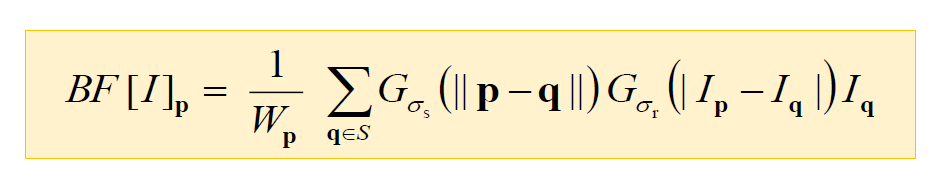
  - Ip, Iq : p점의 이미지, q점의 이미지 , 픽셀값 차이에 의한 가우시안 함수
  - || p-q || : 유클리디안 거리에 대한 가우시안 함수

**``` cv2.bilateralFilter(src,d,sigmaColor, sigmaSpace, dst=None,borderType = None) -> dst ```**
 - d: 필터링에 사용될 이웃 픽셀의 거리 (지름) -> -1일 경우 sigmaSpace 값에 의해 자동으로 결정됨 
 - sigmaColor : 엣지냐 아니냐를 판단하는 기준 , 색 공간에서 필터의 표준 편차
 - sigmaSpace : 좌표 공간에서 필터의 표준 변차
 - borderType : 가장자리 픽셀 처리 방식

In [13]:
import sys
import numpy as np
import cv2

src = cv2.imread('.\\ch04\\lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.bilateralFilter(src, -1, 10, 5)


cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


## 실전코딩 
### 카툰 필터 카메라 

In [1]:
# 카툰 필터 카메라

import sys
import numpy as np
import cv2


def cartoon_filter(img):
    '''
    resize를 통해 속도 개선
    '''
    h, w = img.shape[:2]
    img2 = cv2.resize(img, (w//2, h//2))

    blr = cv2.bilateralFilter(img2, -1, 20, 7)
    edge = 255 - cv2.Canny(img2, 80, 120)
    edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

    dst = cv2.bitwise_and(blr, edge)
    dst = cv2.resize(dst, (w, h), interpolation=cv2.INTER_NEAREST) 
    # resize된 이미지를 다시 원복시키기

    return dst


def pencil_sketch(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blr = cv2.GaussianBlur(gray, (0, 0), 3)
    dst = cv2.divide(gray, blr, scale=255)
    dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

    return dst


cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed!')
    sys.exit()

cam_mode = 0

while True:
    ret, frame = cap.read()

    if not ret:
        break

    if cam_mode == 1:
        frame = cartoon_filter(frame)
    elif cam_mode == 2:
        frame = pencil_sketch(frame)

    cv2.imshow('frame', frame)
    key = cv2.waitKey(1)

    if key == 27:
        break
    elif key == ord(' '):
        cam_mode += 1
        if cam_mode == 3:
            cam_mode = 0


cap.release()
cv2.destroyAllWindows()
